<a href="https://colab.research.google.com/github/Aishwaryap015/IVP-Notebooks/blob/main/IVP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# IMAGE PROCESSING IN GOOGLE COLAB
# DFD (Pixel Difference), DCD (Dominant Colors), 2D FFT
# ============================================================

**Author:** Aishwarya Priydarshni  

In this notebook, we implement:
1. **DFD (Displaced Frame Difference / Pixel Difference)** to analyze pixel intensity changes.  
2. **DCD (Dominant Color Detection)** using KMeans clustering.  
3. **2D Fourier Transform** for frequency domain analysis and reconstruction.  


In [2]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data  # For built-in test images


Saving DOG.jpg to DOG.jpg


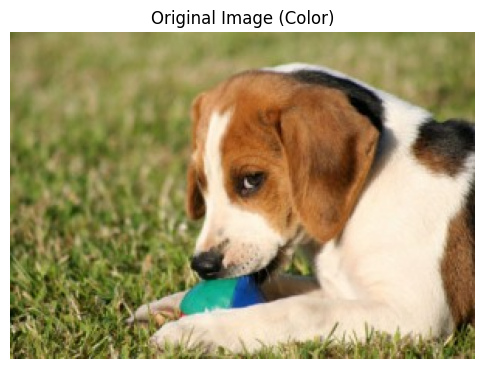

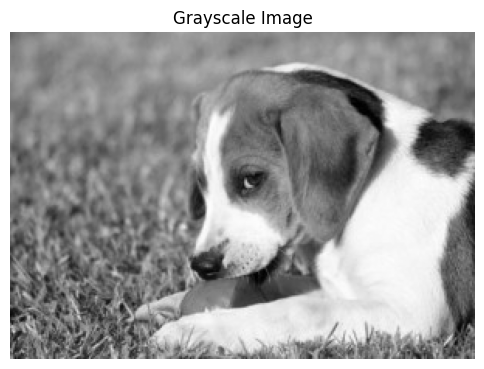


We convert to grayscale because most spatial filtering and frequency analysis
techniques operate on intensity values. Grayscale reduces computation and is
sufficient for DFD, DCD, and 2D FFT operations since color information is not required.



In [4]:
# Upload an image from local machine
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image and convert BGR → RGB
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Original Color Image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image (Color)")
plt.axis("off")
plt.show()

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Display Grayscale Image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Explanation
print("""
We convert to grayscale because most spatial filtering and frequency analysis
techniques operate on intensity values. Grayscale reduces computation and is
sufficient for DFD, DCD, and 2D FFT operations since color information is not required.
""")


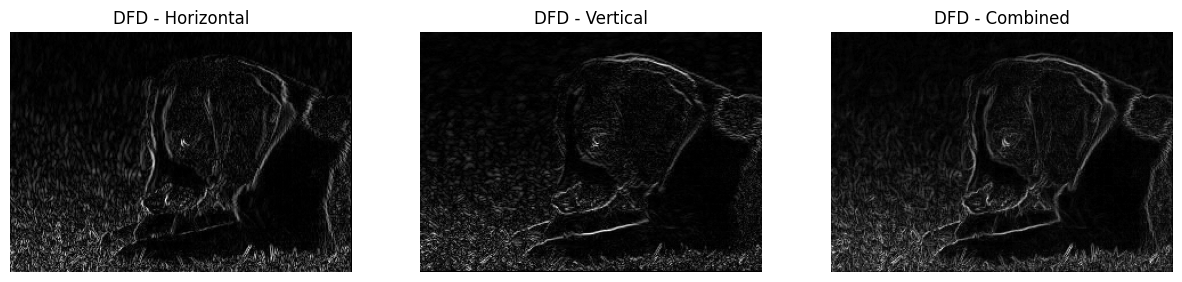

In [5]:
# Horizontal difference
dfd_h = cv2.absdiff(gray[:, :-1], gray[:, 1:])
dfd_h = cv2.copyMakeBorder(dfd_h, 0, 0, 0, 1, cv2.BORDER_CONSTANT, value=0)

# Vertical difference
dfd_v = cv2.absdiff(gray[:-1, :], gray[1:, :])
dfd_v = cv2.copyMakeBorder(dfd_v, 0, 1, 0, 0, cv2.BORDER_CONSTANT, value=0)

# Combined magnitude
dfd_combined = cv2.addWeighted(dfd_h, 0.5, dfd_v, 0.5, 0)

# Display DFD results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(dfd_h, cmap='gray'), plt.title("DFD - Horizontal"), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(dfd_v, cmap='gray'), plt.title("DFD - Vertical"), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(dfd_combined, cmap='gray'), plt.title("DFD - Combined"), plt.axis('off')
plt.show()


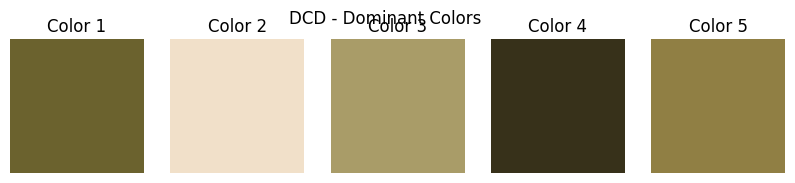

In [6]:
# Reshape image into pixels × 3 channels
pixels = img.reshape((-1, 3))

# Apply KMeans (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42).fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

# Display dominant colors
plt.figure(figsize=(10,2))
for i, col in enumerate(colors):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.ones((100,100,3), dtype=np.uint8) * col)
    plt.title(f"Color {i+1}")
    plt.axis("off")
plt.suptitle("DCD - Dominant Colors")
plt.show()


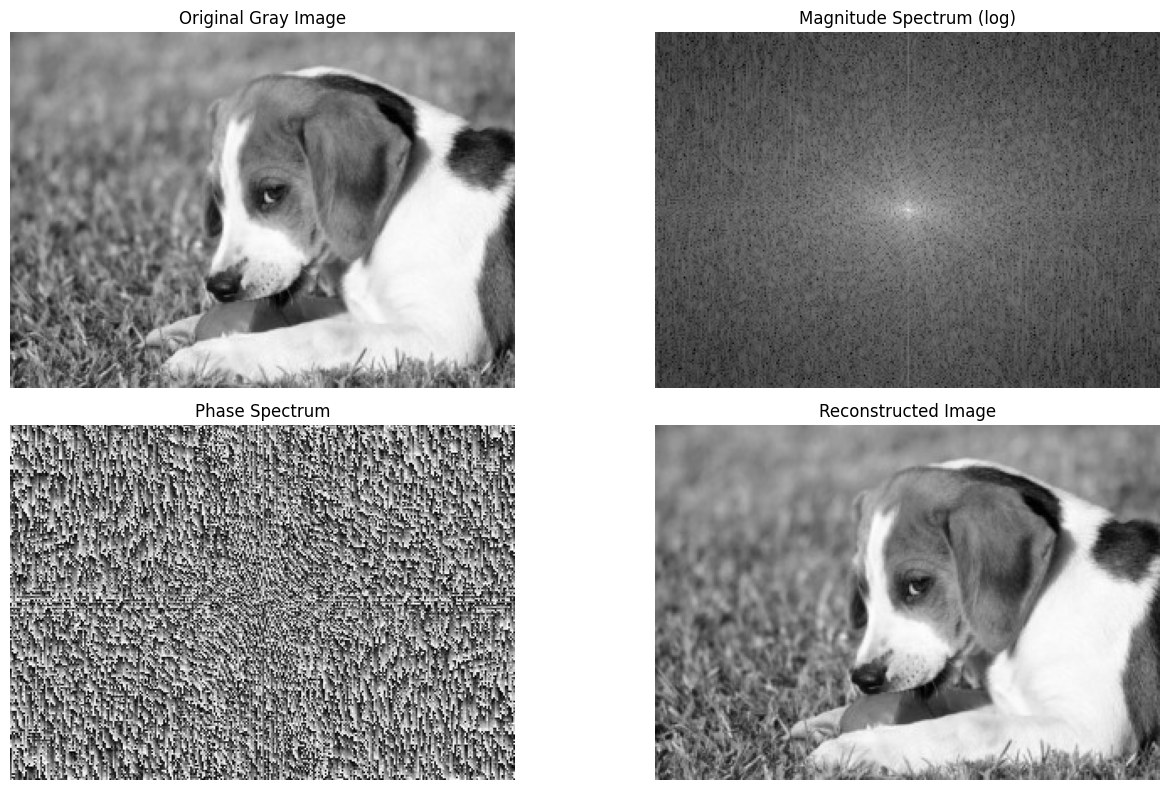

In [7]:
# 2D FFT
F = np.fft.fft2(gray)
Fshift = np.fft.fftshift(F)  # Center low frequencies

# Magnitude and phase
magnitude = np.abs(Fshift)
phase = np.angle(Fshift)
log_magnitude = 20 * np.log(magnitude + 1)  # Log scale

# Inverse FFT
F_ishift = np.fft.ifftshift(Fshift)
img_reconstructed = np.fft.ifft2(F_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Display results
plt.figure(figsize=(14,8))
plt.subplot(2,2,1), plt.imshow(gray, cmap='gray'), plt.title("Original Gray Image"), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(log_magnitude, cmap='gray'), plt.title("Magnitude Spectrum (log)"), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(phase, cmap='gray'), plt.title("Phase Spectrum"), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(img_reconstructed, cmap='gray'), plt.title("Reconstructed Image"), plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
print("===== Original Gray Image (Top-Left 10x10) =====")
print(gray[:10, :10])

print("\n===== Fourier Real Part (Top-Left 10x10) =====")
print(Fshift.real[:10, :10])

print("\n===== Fourier Imaginary Part (Top-Left 10x10) =====")
print(Fshift.imag[:10, :10])

print("\n===== Magnitude Matrix (Top-Left 10x10) =====")
print(magnitude[:10, :10])

print("\n===== Log-Magnitude Matrix (Top-Left 10x10) =====")
print(log_magnitude[:10, :10])

print("\n===== Phase Matrix (Top-Left 10x10) =====")
print(phase[:10, :10])

print("\n===== Reconstructed Image (Top-Left 10x10) =====")
print(img_reconstructed[:10, :10])


===== Original Gray Image (Top-Left 10x10) =====
[[ 99 100 104 109 113 116 119 122 126 125]
 [ 97  99 104 109 113 115 119 122 125 125]
 [ 95  98 104 110 113 114 119 123 125 125]
 [ 97 101 107 112 114 115 120 125 126 127]
 [102 105 111 116 117 117 122 127 128 130]
 [108 111 115 119 120 121 125 130 132 134]
 [114 114 117 121 123 124 128 132 136 137]
 [116 116 118 122 124 127 130 134 139 140]
 [121 120 120 123 126 129 133 136 137 141]
 [125 123 123 125 127 128 132 135 139 143]]

===== Fourier Real Part (Top-Left 10x10) =====
[[ 803.92074116 -425.07945846  -17.37405175  449.63841313   88.30203076
   -18.57714332 -178.31942594  754.52774011   -6.83133376 -175.55914997]
 [ 772.77728723 -475.5246036    -1.51054686  538.22504932  435.9325852
   287.53991214 -254.25358584  141.01866618 -131.19617563 -236.52406119]
 [ 791.92437375 -511.51076298  -24.32054594  398.68394778  468.24043215
   176.78626251   71.09262953   61.04178385 -501.66604378 -164.91369608]
 [ 847.319784   -237.790914   -102.399

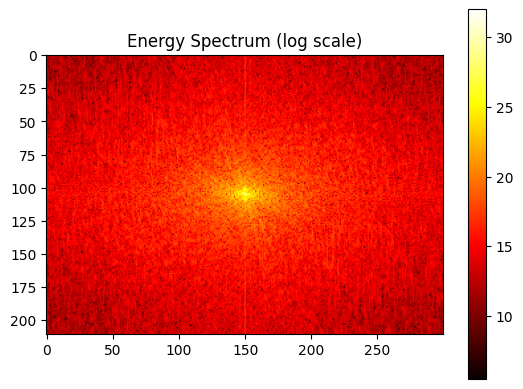

In [9]:
energy = magnitude**2
plt.imshow(np.log(energy + 1), cmap='hot')
plt.title("Energy Spectrum (log scale)")
plt.colorbar()
plt.show()


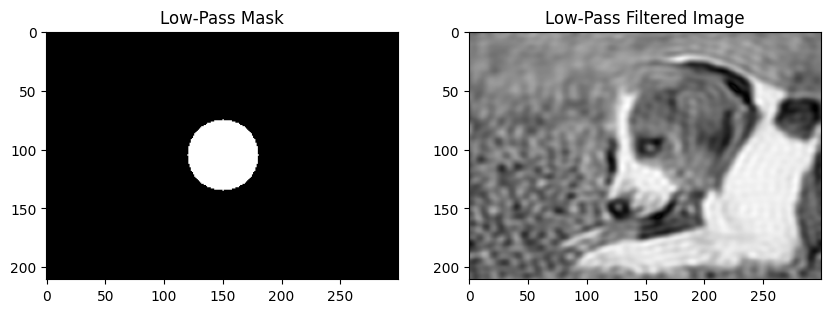

In [10]:
rows, cols = gray.shape
crow, ccol = rows//2 , cols//2

# Create Low-Pass Mask (circle)
mask = np.zeros((rows, cols), np.uint8)
r = 30  # radius
cv2.circle(mask, (ccol, crow), r, 1, -1)

# Apply Mask
F_low = Fshift * mask
F_low_ishift = np.fft.ifftshift(F_low)
img_low = np.abs(np.fft.ifft2(F_low_ishift))

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(mask, cmap='gray'), plt.title("Low-Pass Mask")
plt.subplot(1,2,2), plt.imshow(img_low, cmap='gray'), plt.title("Low-Pass Filtered Image")
plt.show()


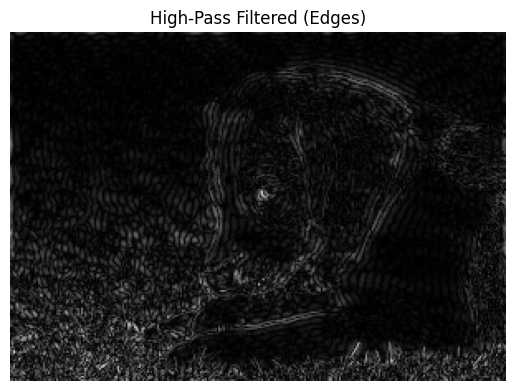

In [11]:
# High-Pass = 1 - Low-Pass
mask_hp = 1 - mask
F_high = Fshift * mask_hp
F_high_ishift = np.fft.ifftshift(F_high)
img_high = np.abs(np.fft.ifft2(F_high_ishift))

plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Filtered (Edges)")
plt.axis("off")
plt.show()


In [12]:
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

print("MSE (Original vs Reconstructed):", mse(gray, img_reconstructed))
print("PSNR (Original vs Reconstructed):", psnr(gray, img_reconstructed))
print("MSE (Original vs Low-Pass):", mse(gray, img_low))
print("PSNR (Original vs Low-Pass):", psnr(gray, img_low))


MSE (Original vs Reconstructed): 4.5644837525327175e-27
PSNR (Original vs Reconstructed): 311.53688695340344
MSE (Original vs Low-Pass): 163.3412011220611
PSNR (Original vs Low-Pass): 25.999846160390504


/tmp/ipython-input-4064464758.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR (Original vs Reconstructed):", psnr(gray, img_reconstructed))
/tmp/ipython-input-4064464758.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR (Original vs Low-Pass):", psnr(gray, img_low))


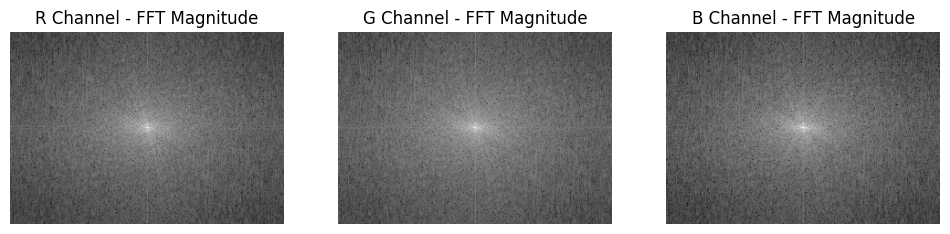

In [13]:
channels = cv2.split(img)
colors = ['R', 'G', 'B']

plt.figure(figsize=(12,6))
for i, ch in enumerate(channels):
    Fch = np.fft.fftshift(np.fft.fft2(ch))
    log_mag_ch = 20*np.log(np.abs(Fch)+1)
    plt.subplot(1,3,i+1)
    plt.imshow(log_mag_ch, cmap='gray')
    plt.title(f"{colors[i]} Channel - FFT Magnitude")
    plt.axis("off")
plt.show()


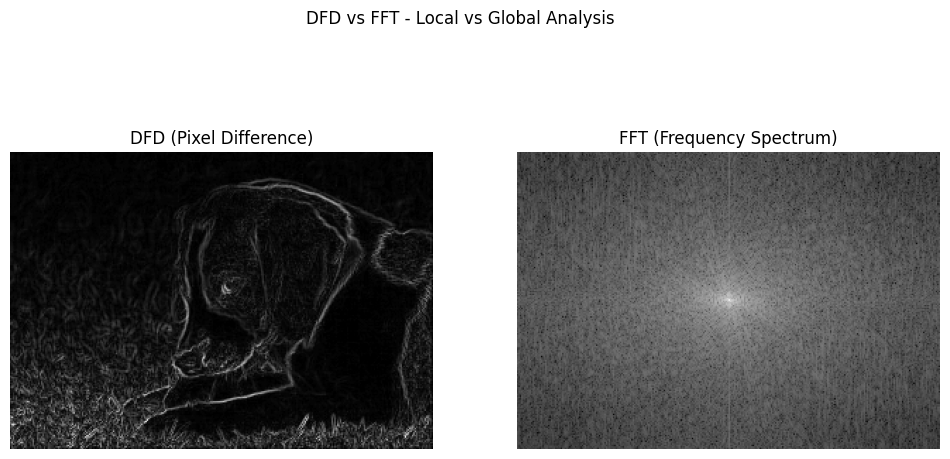

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(dfd_combined, cmap='gray'), plt.title("DFD (Pixel Difference)"), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(log_magnitude, cmap='gray'), plt.title("FFT (Frequency Spectrum)"), plt.axis('off')
plt.suptitle("DFD vs FFT - Local vs Global Analysis")
plt.show()
